<a href="https://colab.research.google.com/github/amrutha-m-sajeev/Machine-learning-classification-model/blob/main/drug_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
df=pd.read_csv('/content/drug200.csv')
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [ ]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [ ]:
df.tail()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


In [ ]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [ ]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [ ]:
df['Sex'].value_counts()

M    104
F     96
Name: Sex, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

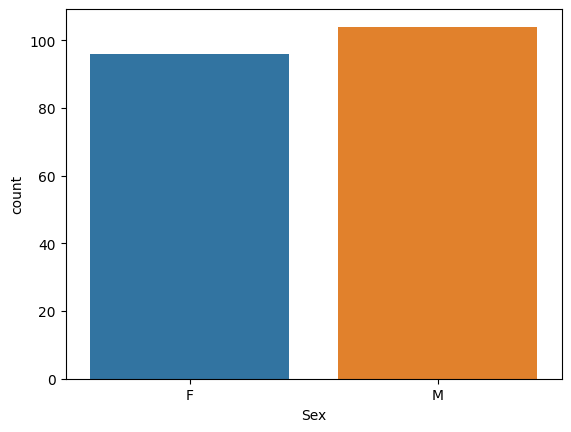

In [ ]:
sns.countplot(x=df['Sex'],data=df)

In [ ]:
df['BP'].value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

<Axes: xlabel='BP', ylabel='count'>

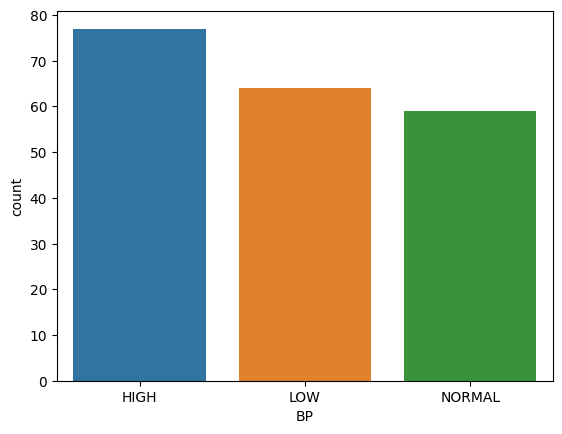

In [ ]:
sns.countplot(x=df['BP'],data=df)

In [ ]:
df['Cholesterol'].value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

<Axes: xlabel='Cholesterol', ylabel='count'>

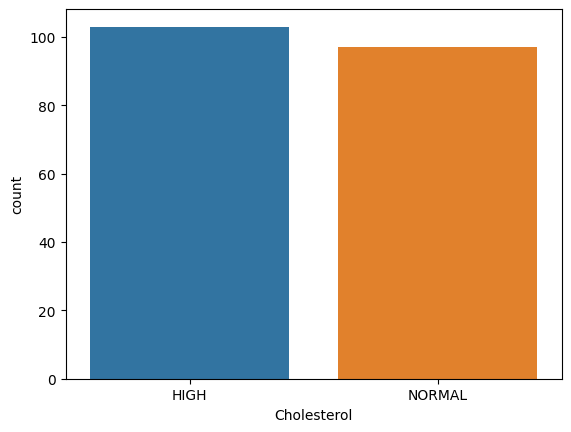

In [ ]:
sns.countplot(x=df['Cholesterol'],data=df)

In [ ]:
df1=pd.get_dummies(df[['Sex','BP','Cholesterol']],drop_first=True)
df1

,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL
0,0,0,0,0
1,1,1,0,0
2,1,1,0,0
3,0,0,1,0
4,0,1,0,0
...,...,...,...,...
195,0,1,0,0
196,1,1,0,0
197,1,0,1,0
198,1,0,1,1


In [ ]:
df2=pd.concat([df,df1],axis=1)
df2

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL
0,23,F,HIGH,HIGH,25.355,drugY,0,0,0,0
1,47,M,LOW,HIGH,13.093,drugC,1,1,0,0
2,47,M,LOW,HIGH,10.114,drugC,1,1,0,0
3,28,F,NORMAL,HIGH,7.798,drugX,0,0,1,0
4,61,F,LOW,HIGH,18.043,drugY,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC,0,1,0,0
196,16,M,LOW,HIGH,12.006,drugC,1,1,0,0
197,52,M,NORMAL,HIGH,9.894,drugX,1,0,1,0
198,23,M,NORMAL,NORMAL,14.020,drugX,1,0,1,1


In [ ]:
df2.drop(['Sex','BP','Cholesterol'],axis=1,inplace=True)
df2

,Age,Na_to_K,Drug,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL
0,23,25.355,drugY,0,0,0,0
1,47,13.093,drugC,1,1,0,0
2,47,10.114,drugC,1,1,0,0
3,28,7.798,drugX,0,0,1,0
4,61,18.043,drugY,0,1,0,0
...,...,...,...,...,...,...,...
195,56,11.567,drugC,0,1,0,0
196,16,12.006,drugC,1,1,0,0
197,52,9.894,drugX,1,0,1,0
198,23,14.020,drugX,1,0,1,1


In [ ]:
x=df2.drop(['Drug'],axis=1).values
x

array([[23.   , 25.355,  0.   ,  0.   ,  0.   ,  0.   ],
       [47.   , 13.093,  1.   ,  1.   ,  0.   ,  0.   ],
       [47.   , 10.114,  1.   ,  1.   ,  0.   ,  0.   ],
       ...,
       [52.   ,  9.894,  1.   ,  0.   ,  1.   ,  0.   ],
       [23.   , 14.02 ,  1.   ,  0.   ,  1.   ,  1.   ],
       [40.   , 11.349,  0.   ,  1.   ,  0.   ,  1.   ]])

In [ ]:
y=df2['Drug'].values
y

array(['drugY', 'drugC', 'drugC', 'drugX', 'drugY', 'drugX', 'drugY',
       'drugC', 'drugY', 'drugY', 'drugC', 'drugY', 'drugY', 'drugY',
       'drugX', 'drugY', 'drugX', 'drugA', 'drugC', 'drugY', 'drugY',
       'drugY', 'drugY', 'drugY', 'drugY', 'drugY', 'drugY', 'drugX',
       'drugY', 'drugY', 'drugX', 'drugB', 'drugX', 'drugY', 'drugX',
       'drugX', 'drugA', 'drugX', 'drugX', 'drugX', 'drugY', 'drugB',
       'drugY', 'drugX', 'drugX', 'drugX', 'drugA', 'drugC', 'drugY',
       'drugY', 'drugY', 'drugX', 'drugY', 'drugY', 'drugB', 'drugC',
       'drugB', 'drugY', 'drugX', 'drugY', 'drugY', 'drugA', 'drugY',
       'drugX', 'drugB', 'drugY', 'drugA', 'drugX', 'drugY', 'drugY',
       'drugB', 'drugY', 'drugX', 'drugY', 'drugY', 'drugY', 'drugA',
       'drugY', 'drugA', 'drugX', 'drugB', 'drugX', 'drugC', 'drugA',
       'drugC', 'drugB', 'drugX', 'drugY', 'drugY', 'drugY', 'drugY',
       'drugY', 'drugY', 'drugY', 'drugY', 'drugX', 'drugY', 'drugY',
       'drugY', 'dru

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train

array([[20.   , 11.262,  0.   ,  0.   ,  0.   ,  0.   ],
       [56.   , 25.395,  0.   ,  0.   ,  0.   ,  0.   ],
       [74.   ,  9.567,  1.   ,  0.   ,  0.   ,  0.   ],
       [43.   , 15.376,  1.   ,  1.   ,  0.   ,  0.   ],
       [46.   ,  7.285,  1.   ,  0.   ,  1.   ,  1.   ],
       [61.   , 25.475,  0.   ,  0.   ,  0.   ,  0.   ],
       [50.   , 15.79 ,  1.   ,  0.   ,  1.   ,  1.   ],
       [64.   , 20.932,  1.   ,  0.   ,  0.   ,  1.   ],
       [62.   , 16.594,  1.   ,  0.   ,  1.   ,  0.   ],
       [55.   , 10.977,  0.   ,  0.   ,  0.   ,  0.   ],
       [67.   , 10.898,  1.   ,  0.   ,  1.   ,  1.   ],
       [35.   ,  7.845,  1.   ,  0.   ,  1.   ,  1.   ],
       [43.   , 12.859,  1.   ,  0.   ,  1.   ,  1.   ],
       [58.   , 14.239,  0.   ,  0.   ,  0.   ,  1.   ],
       [32.   , 10.292,  0.   ,  0.   ,  0.   ,  1.   ],
       [65.   , 13.769,  0.   ,  1.   ,  0.   ,  1.   ],
       [31.   , 30.366,  1.   ,  0.   ,  0.   ,  0.   ],
       [69.   , 10.065,  0.   ,

In [ ]:
x_test

array([[36.   , 11.424,  1.   ,  1.   ,  0.   ,  1.   ],
       [16.   , 15.516,  0.   ,  0.   ,  0.   ,  1.   ],
       [18.   ,  8.75 ,  0.   ,  0.   ,  1.   ,  1.   ],
       [59.   , 10.444,  0.   ,  1.   ,  0.   ,  0.   ],
       [47.   , 33.542,  1.   ,  1.   ,  0.   ,  1.   ],
       [51.   , 18.295,  1.   ,  0.   ,  0.   ,  0.   ],
       [18.   , 24.276,  0.   ,  0.   ,  0.   ,  1.   ],
       [28.   , 12.879,  0.   ,  0.   ,  1.   ,  0.   ],
       [42.   , 12.766,  1.   ,  0.   ,  0.   ,  1.   ],
       [66.   ,  8.107,  0.   ,  0.   ,  1.   ,  1.   ],
       [29.   , 12.856,  1.   ,  0.   ,  0.   ,  0.   ],
       [20.   , 11.686,  0.   ,  1.   ,  0.   ,  1.   ],
       [38.   , 18.295,  1.   ,  1.   ,  0.   ,  0.   ],
       [19.   , 13.313,  0.   ,  0.   ,  0.   ,  0.   ],
       [70.   ,  9.849,  1.   ,  0.   ,  0.   ,  0.   ],
       [25.   , 19.011,  1.   ,  0.   ,  1.   ,  0.   ],
       [65.   , 11.34 ,  1.   ,  0.   ,  0.   ,  1.   ],
       [55.   ,  7.261,  1.   ,

In [ ]:
y_train

array(['drugA', 'drugY', 'drugB', 'drugY', 'drugX', 'drugY', 'drugY',
       'drugY', 'drugY', 'drugB', 'drugX', 'drugX', 'drugX', 'drugB',
       'drugA', 'drugX', 'drugY', 'drugX', 'drugA', 'drugX', 'drugC',
       'drugY', 'drugA', 'drugA', 'drugA', 'drugB', 'drugB', 'drugA',
       'drugY', 'drugA', 'drugY', 'drugY', 'drugA', 'drugY', 'drugY',
       'drugY', 'drugX', 'drugY', 'drugX', 'drugY', 'drugY', 'drugX',
       'drugB', 'drugX', 'drugY', 'drugA', 'drugC', 'drugY', 'drugX',
       'drugX', 'drugY', 'drugY', 'drugX', 'drugX', 'drugB', 'drugY',
       'drugB', 'drugX', 'drugY', 'drugY', 'drugY', 'drugB', 'drugC',
       'drugA', 'drugY', 'drugY', 'drugY', 'drugA', 'drugX', 'drugX',
       'drugY', 'drugC', 'drugY', 'drugY', 'drugX', 'drugB', 'drugX',
       'drugX', 'drugY', 'drugY', 'drugY', 'drugY', 'drugY', 'drugY',
       'drugB', 'drugX', 'drugC', 'drugA', 'drugY', 'drugA', 'drugA',
       'drugX', 'drugY', 'drugY', 'drugY', 'drugY', 'drugX', 'drugY',
       'drugA', 'dru

In [ ]:
y_test

array(['drugX', 'drugY', 'drugX', 'drugC', 'drugY', 'drugY', 'drugY',
       'drugX', 'drugA', 'drugX', 'drugA', 'drugX', 'drugY', 'drugA',
       'drugB', 'drugY', 'drugB', 'drugX', 'drugC', 'drugY', 'drugB',
       'drugX', 'drugX', 'drugY', 'drugY', 'drugY', 'drugC', 'drugX',
       'drugY', 'drugX', 'drugY', 'drugC', 'drugC', 'drugY', 'drugA',
       'drugY', 'drugX', 'drugA', 'drugY', 'drugA', 'drugX', 'drugX',
       'drugX', 'drugY', 'drugY', 'drugC', 'drugY', 'drugY', 'drugY',
       'drugX', 'drugX', 'drugY', 'drugX', 'drugY', 'drugX', 'drugY',
       'drugA', 'drugY', 'drugY', 'drugY'], dtype=object)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
d_model=DecisionTreeClassifier()
k_model=KNeighborsClassifier(n_neighbors=7)
nb_model=GaussianNB()
sv_model=SVC()
model=[d_model,k_model,nb_model,sv_model]

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
for i in model:
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  result=confusion_matrix(y_test,y_pred)
  print(result)
  print(accuracy_score(y_test,y_pred))
  print(classification_report(y_test,y_pred))
  print("*"*100)

[[ 7  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  6  0  0]
 [ 0  0  0 18  0]
 [ 0  0  0  0 26]]
1.0
              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         6
       drugX       1.00      1.00      1.00        18
       drugY       1.00      1.00      1.00        26

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

****************************************************************************************************
[[ 4  0  0  3  0]
 [ 0  1  0  2  0]
 [ 2  1  1  2  0]
 [ 6  3  0  9  0]
 [ 0  0  0  1 25]]
0.6666666666666666
              precision    recall  f1-score   support

       drugA       0.33      0.57      0.42         7
       drugB       0.20      0.33      0.25         3
       drugC       1.00      0.17      0.2

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,ConfusionMatrixDisplay
result=confusion_matrix(y_test,y_pred)

result

array([[ 0,  0,  0,  6,  1],
       [ 0,  0,  0,  3,  0],
       [ 0,  0,  0,  5,  1],
       [ 0,  0,  0, 18,  0],
       [ 0,  0,  0,  0, 26]])

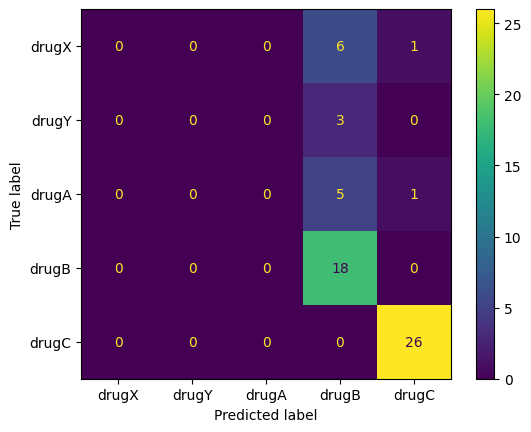

In [ ]:
labels=['drugX','drugY','drugA','drugB','drugC']
cmd=ConfusionMatrixDisplay(result,display_labels=labels)
cmd.plot()

In [ ]:
score=accuracy_score(y_test,y_pred)
score

0.7333333333333333